In [1]:
# load packages

import os
import pandas as pd
from qsprpred.data import QSPRDataset
from sklearn.impute import SimpleImputer
from qsprpred.data import QSPRDataset, RandomSplit
from qsprpred.data.descriptors.fingerprints import MorganFP
from qsprpred.data.descriptors.sets import SmilesDesc
from qsprpred.data.sampling.splits import GBMTRandomSplit, GBMTDataSplit, ManualSplit
from split import random_global_equilibrated_random_split, dissimilaritydrive_global_balanced_cluster_split
from qsprpred.extra.gpu.models.chemprop import ChempropModel
from qsprpred.models import CrossValAssessor, TestSetAssessor
from qsprpred.models.early_stopping import EarlyStoppingMode
from qsprpred.models import SklearnModel
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
# from qsprpred.plotting.regression import CorrelationPlot
from plotting_regression_MT import CorrelationPlot

Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


In [2]:
df=pd.read_csv('/home/s2861704/ppk/test_kin/output/TK/TK_split.csv', sep=',')
display(df)
print(df.columns)

,SMILES,O60674,P00519,P00533,P04626,P04629,P06213,P06239,P07333,P07949,...,Q06187,Q06418,Q07912,Q08345,Q08881,Q12866,Q16288,Q16620,Q16832,split
0,BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
1,BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
2,BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
3,Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
4,Brc1cc2c(NCc3ccccc3)ncnc2s1,NaN,NaN,6.62,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36999,c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
37000,c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
37001,c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train
37002,c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train


Index(['SMILES', 'O60674', 'P00519', 'P00533', 'P04626', 'P04629', 'P06213',
       'P06239', 'P07333', 'P07949', 'P08069', 'P08581', 'P09581', 'P09619',
       'P10721', 'P11362', 'P12931', 'P16234', 'P17948', 'P21802', 'P22455',
       'P22607', 'P23458', 'P29317', 'P29597', 'P30530', 'P35968', 'P36888',
       'P43405', 'P52333', 'P54760', 'Q02763', 'Q05397', 'Q06187', 'Q06418',
       'Q07912', 'Q08345', 'Q08881', 'Q12866', 'Q16288', 'Q16620', 'Q16832',
       'split'],
      dtype='object')


In [3]:
targets_kinase200 = df.columns[1:42].tolist()
display(targets_kinase200)

['O60674',
 'P00519',
 'P00533',
 'P04626',
 'P04629',
 'P06213',
 'P06239',
 'P07333',
 'P07949',
 'P08069',
 'P08581',
 'P09581',
 'P09619',
 'P10721',
 'P11362',
 'P12931',
 'P16234',
 'P17948',
 'P21802',
 'P22455',
 'P22607',
 'P23458',
 'P29317',
 'P29597',
 'P30530',
 'P35968',
 'P36888',
 'P43405',
 'P52333',
 'P54760',
 'Q02763',
 'Q05397',
 'Q06187',
 'Q06418',
 'Q07912',
 'Q08345',
 'Q08881',
 'Q12866',
 'Q16288',
 'Q16620',
 'Q16832']

In [ ]:
for target in targets_kinase200:
    print(target)
    df_st = df[["SMILES", target, "split"]]
    print(df_st)
    df_st_nonan = df_st.dropna(axis=0)
    
    print(df_st_nonan)

    # Create dataset
    os.makedirs("output/final/data", exist_ok=True)
    ds_name = "QSPRDataset_" + target
    dataset = QSPRDataset(
        df=df_st_nonan,
        store_dir="output/final/data",
        name=ds_name,
        target_props=[{"name": target, "task": "REGRESSION"}],
        random_state=42,
        overwrite=True
    )
    dataset.save()
    dataset.getDF()

    # calculate compound features and split dataset into train and test
    feature_calculators = [MorganFP(radius=3, nBits=2048)]
    dataset.prepareDataset(
        split=ManualSplit(splitcol=dataset.df["split"], trainval="train", testval="test"),
        feature_calculators=feature_calculators,
        recalculate_features=True,
    )
    print(f"Number of samples in train set: {len(dataset.y)}")
    print(f"Number of samples in test set: {len(dataset.y_ind)}")

    os.makedirs("/home/s2861704/ppk/test_kin/output/final/models", exist_ok=True)
    model_name = "QSPRModel_" + target
    model = SklearnModel(
        base_dir="/home/s2861704/ppk/test_kin/output/final/models",
        # alg=KNeighbourssRegressor,
        alg=RandomForestRegressor,
        name=model_name
    )

    CrossValAssessor("r2")(model, dataset)
    TestSetAssessor("r2")(model, dataset)
    model.fitDataset(dataset)
    _ = model.save()

    # plot results
    path = '/home/s2861704/ppk/test_kin/output/final/'
    fullname = os.path.join(path, target)
    outdir = fullname + '.png'

    plot = CorrelationPlot([model])
    axes, summary = plot.make(save=True, show=True, out_path=outdir)

In [4]:
targets_kinase200 = df.columns[1:42].tolist()
display(targets_kinase200)
print(len(targets_kinase200))

selected_targets = targets_kinase200.copy()
del selected_targets[32:]
del selected_targets[29:31]
del selected_targets[16:18]
del selected_targets[11:14]
del selected_targets[8]
del selected_targets[4:7]
display(selected_targets)
print(len(selected_targets))

top_targets = targets_kinase200.copy()
del top_targets[32:]
del top_targets[29:31]
del top_targets[26]
del top_targets[22:25]
del top_targets[10:21]
del top_targets[8]
del top_targets[4:7]
del top_targets[0:2]
display(top_targets)
print(len(top_targets))

['O60674',
 'P00519',
 'P00533',
 'P04626',
 'P04629',
 'P06213',
 'P06239',
 'P07333',
 'P07949',
 'P08069',
 'P08581',
 'P09581',
 'P09619',
 'P10721',
 'P11362',
 'P12931',
 'P16234',
 'P17948',
 'P21802',
 'P22455',
 'P22607',
 'P23458',
 'P29317',
 'P29597',
 'P30530',
 'P35968',
 'P36888',
 'P43405',
 'P52333',
 'P54760',
 'Q02763',
 'Q05397',
 'Q06187',
 'Q06418',
 'Q07912',
 'Q08345',
 'Q08881',
 'Q12866',
 'Q16288',
 'Q16620',
 'Q16832']

41


['O60674',
 'P00519',
 'P00533',
 'P04626',
 'P07333',
 'P08069',
 'P08581',
 'P11362',
 'P12931',
 'P21802',
 'P22455',
 'P22607',
 'P23458',
 'P29317',
 'P29597',
 'P30530',
 'P35968',
 'P36888',
 'P43405',
 'P52333',
 'Q05397']

21


['P00533',
 'P04626',
 'P07333',
 'P08069',
 'P23458',
 'P35968',
 'P43405',
 'P52333',
 'Q05397']

9


In [5]:
test_mols = df['SMILES'].tolist()
display(test_mols)
print(len(test_mols))

df_results = pd.DataFrame({'SMILES':test_mols})
display(df_results)

['BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1',
 'BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1',
 'BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1',
 'Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1',
 'Brc1cc2c(NCc3ccccc3)ncnc2s1',
 'Brc1cc2c(NCc3ccccn3)ncnc2s1',
 'Brc1cc2c(NCc3cccs3)ncnc2s1',
 'Brc1cc2c(NCc3ccncc3)ncnc2s1',
 'Brc1cc2c(Nc3ccccc3)ncnc2s1',
 'Brc1ccc(-c2cnc3nnc(Cc4c[nH]c5ccccc45)n3n2)cc1',
 'Brc1ccc(-c2cnc3nnc(Cc4ccc5ncccc5c4)n3n2)cc1',
 'Brc1ccc(-c2nc3cc(Nc4ccnc5ccccc45)ccc3[nH]2)cc1',
 'Brc1ccc(-c2nc3cc(Nc4ncnc5ccccc45)ccc3[nH]2)cc1',
 'Brc1ccc(-c2nnc(Cn3nnc4ccccc43)o2)cc1',
 'Brc1ccc(Br)c(Nc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)c1',
 'Brc1ccc(C2=NN(c3ccccc3)C(c3ccc4ccccc4c3)C2)cc1',
 'Brc1ccc(C2=NN(c3ccccc3)C(c3cccc4ccccc34)C2)cc1',
 'Brc1ccc(C2=NN(c3nc(-c4ccc(Br)cc4)cs3)C(c3ccc4c(c3)OCCO4)C2)cc1',
 'Brc1ccc(C2=NN(c3nc(-c4ccc(Br)cc4)cs3)C(c3ccc4c(c3)OCO4)C2)cc1',
 'Brc1ccc(CSc2nnc(Cn3nnc4ccccc43)o2)cc1',
 'Brc1ccc(Cc2nnc(Cn3nnc4ccccc43)o2)cc1',
 'Brc1ccc(Nc2nc(N3CCOCC3)nc3c2ncn3C2CCCCO2)cc1',
 'B

37004


,SMILES
0,BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1
1,BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1
2,BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1
3,Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1
4,Brc1cc2c(NCc3ccccc3)ncnc2s1
...,...
36999,c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...
37000,c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...
37001,c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...
37002,c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1


In [ ]:
for target in selected_targets:
    print(target)
    data_loc = "/home/s2861704/ppk/test_kin/output/final/data/QSPRDataset_" + target + "/QSPRDataset_" + target + "_meta.json"
    model_loc = "/home/s2861704/ppk/test_kin/output/final/models/QSPRModel_" + target + "/QSPRModel_" + target + "_meta.json"
    dataset = QSPRDataset.fromFile(
        data_loc)
    model = SklearnModel.fromFile(
        model_loc)
    pred_array = model.predictMols(test_mols)
    print(pred_array)
    df_results[f'{target}'] = pred_array.tolist()
    print(type(df_results.loc[df_results.index[0], f'{target}']))
    df_results[f'{target}'] = df_results[f'{target}'].str.get(0)
    # df_results[f'{target}'] = df_results[f'{target}'].str.strip('[]').astype(float) - for string
    # df_results[f'{target}'] = pd.to_numeric(df_results[f'{target}']) - for integer

display(df_results)

In [ ]:
print(type(df_results.loc[df_results.index[0], 'P00533']))

In [ ]:
df_results.to_csv(path_or_buf='/home/s2861704/ppk/test_kin/output/final/results/prediction_df_full.csv', sep=',', index=False)

In [6]:
pred_df_top = pd.read_csv('/home/s2861704/ppk/test_kin/output/final/results/prediction_df_top.csv', sep=',')
pred_df_full = pd.read_csv('/home/s2861704/ppk/test_kin/output/final/results/prediction_df_full.csv', sep=',')
display(pred_df_top)
display(pred_df_full)

,SMILES,P00533,P04626,P07333,P08069,P23458,P35968,P43405,P52333,Q05397
0,BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1,5.411131,5.855713,6.815296,6.353450,6.877938,6.986183,6.160137,6.549130,5.102925
1,BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1,5.303161,5.881963,6.811746,6.287350,6.828168,7.023983,6.160137,6.570330,5.080575
2,BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1,6.033549,6.133460,7.175127,6.145930,6.867429,6.424890,5.952967,6.034330,5.178875
3,Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1,6.484560,5.945370,7.123521,6.649050,6.914020,6.277680,6.783466,6.801767,5.699100
4,Brc1cc2c(NCc3ccccc3)ncnc2s1,6.405848,5.778008,7.086318,6.572180,6.426210,6.123380,5.565847,5.811820,5.042525
...,...,...,...,...,...,...,...,...,...,...
36999,c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...,6.716743,6.374507,7.046838,6.352633,7.170630,6.845250,6.387299,7.038622,6.330222
37000,c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...,6.741636,6.454327,6.969488,6.299179,6.790170,6.173017,6.446100,6.869475,6.236642
37001,c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...,6.013665,6.119780,6.795608,7.280000,6.693807,7.007380,6.331677,6.782267,5.669535
37002,c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1,6.257774,5.613750,7.494755,6.649717,6.574850,6.953300,6.361343,6.770900,5.325325


,SMILES,O60674,P00519,P00533,P04626,P07333,P08069,P08581,P11362,P12931,...,P22607,P23458,P29317,P29597,P30530,P35968,P36888,P43405,P52333,Q05397
0,BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1,6.395900,8.313470,5.411131,5.855713,6.815296,6.353450,5.830525,6.669500,5.285800,...,6.955324,6.877938,6.772892,6.595541,6.311520,6.986183,6.596820,6.160137,6.549130,5.102925
1,BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1,6.327750,8.345170,5.303161,5.881963,6.811746,6.287350,5.840525,6.568350,5.694700,...,6.960654,6.828168,6.772892,6.596141,6.305320,7.023983,6.643720,6.160137,6.570330,5.080575
2,BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1,6.256500,6.100292,6.033549,6.133460,7.175127,6.145930,5.891498,5.945120,5.642300,...,6.785305,6.867429,6.489195,6.842091,6.310400,6.424890,6.183356,5.952967,6.034330,5.178875
3,Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1,6.907220,6.059033,6.484560,5.945370,7.123521,6.649050,6.334000,6.974837,7.002327,...,7.090351,6.914020,6.389882,7.549300,5.590300,6.277680,6.794243,6.783466,6.801767,5.699100
4,Brc1cc2c(NCc3ccccc3)ncnc2s1,6.311750,6.173164,6.405848,5.778008,7.086318,6.572180,5.933417,6.012000,5.586700,...,6.571890,6.426210,6.524198,6.934830,6.345230,6.123380,6.360935,5.565847,5.811820,5.042525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36999,c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...,6.707830,5.477080,6.716743,6.374507,7.046838,6.352633,7.445553,7.232634,6.131680,...,6.744217,7.170630,6.175795,7.462650,7.113075,6.845250,7.394481,6.387299,7.038622,6.330222
37000,c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...,6.809560,5.480450,6.741636,6.454327,6.969488,6.299179,7.266203,7.230054,6.294680,...,6.740397,6.790170,6.198834,7.497750,7.056100,6.173017,7.220451,6.446100,6.869475,6.236642
37001,c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...,6.668707,6.266217,6.013665,6.119780,6.795608,7.280000,6.383450,6.928873,6.717553,...,7.056067,6.693807,6.645033,6.925180,5.670300,7.007380,7.210380,6.331677,6.782267,5.669535
37002,c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1,6.424367,6.309309,6.257774,5.613750,7.494755,6.649717,7.052672,7.266681,5.674808,...,7.284914,6.574850,6.878937,6.567500,6.279070,6.953300,7.126385,6.361343,6.770900,5.325325


In [7]:
pred_df_noSMILES = pred_df_top.drop(['SMILES'], axis=1)
display(pred_df_noSMILES)
pred_df_full_noSMILES = pred_df_full.drop(['SMILES'], axis=1)
display(pred_df_full_noSMILES)

,P00533,P04626,P07333,P08069,P23458,P35968,P43405,P52333,Q05397
0,5.411131,5.855713,6.815296,6.353450,6.877938,6.986183,6.160137,6.549130,5.102925
1,5.303161,5.881963,6.811746,6.287350,6.828168,7.023983,6.160137,6.570330,5.080575
2,6.033549,6.133460,7.175127,6.145930,6.867429,6.424890,5.952967,6.034330,5.178875
3,6.484560,5.945370,7.123521,6.649050,6.914020,6.277680,6.783466,6.801767,5.699100
4,6.405848,5.778008,7.086318,6.572180,6.426210,6.123380,5.565847,5.811820,5.042525
...,...,...,...,...,...,...,...,...,...
36999,6.716743,6.374507,7.046838,6.352633,7.170630,6.845250,6.387299,7.038622,6.330222
37000,6.741636,6.454327,6.969488,6.299179,6.790170,6.173017,6.446100,6.869475,6.236642
37001,6.013665,6.119780,6.795608,7.280000,6.693807,7.007380,6.331677,6.782267,5.669535
37002,6.257774,5.613750,7.494755,6.649717,6.574850,6.953300,6.361343,6.770900,5.325325


,O60674,P00519,P00533,P04626,P07333,P08069,P08581,P11362,P12931,P21802,...,P22607,P23458,P29317,P29597,P30530,P35968,P36888,P43405,P52333,Q05397
0,6.395900,8.313470,5.411131,5.855713,6.815296,6.353450,5.830525,6.669500,5.285800,6.545300,...,6.955324,6.877938,6.772892,6.595541,6.311520,6.986183,6.596820,6.160137,6.549130,5.102925
1,6.327750,8.345170,5.303161,5.881963,6.811746,6.287350,5.840525,6.568350,5.694700,6.541000,...,6.960654,6.828168,6.772892,6.596141,6.305320,7.023983,6.643720,6.160137,6.570330,5.080575
2,6.256500,6.100292,6.033549,6.133460,7.175127,6.145930,5.891498,5.945120,5.642300,6.598026,...,6.785305,6.867429,6.489195,6.842091,6.310400,6.424890,6.183356,5.952967,6.034330,5.178875
3,6.907220,6.059033,6.484560,5.945370,7.123521,6.649050,6.334000,6.974837,7.002327,7.223883,...,7.090351,6.914020,6.389882,7.549300,5.590300,6.277680,6.794243,6.783466,6.801767,5.699100
4,6.311750,6.173164,6.405848,5.778008,7.086318,6.572180,5.933417,6.012000,5.586700,6.545576,...,6.571890,6.426210,6.524198,6.934830,6.345230,6.123380,6.360935,5.565847,5.811820,5.042525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36999,6.707830,5.477080,6.716743,6.374507,7.046838,6.352633,7.445553,7.232634,6.131680,6.241497,...,6.744217,7.170630,6.175795,7.462650,7.113075,6.845250,7.394481,6.387299,7.038622,6.330222
37000,6.809560,5.480450,6.741636,6.454327,6.969488,6.299179,7.266203,7.230054,6.294680,6.301783,...,6.740397,6.790170,6.198834,7.497750,7.056100,6.173017,7.220451,6.446100,6.869475,6.236642
37001,6.668707,6.266217,6.013665,6.119780,6.795608,7.280000,6.383450,6.928873,6.717553,7.420071,...,7.056067,6.693807,6.645033,6.925180,5.670300,7.007380,7.210380,6.331677,6.782267,5.669535
37002,6.424367,6.309309,6.257774,5.613750,7.494755,6.649717,7.052672,7.266681,5.674808,6.775838,...,7.284914,6.574850,6.878937,6.567500,6.279070,6.953300,7.126385,6.361343,6.770900,5.325325


In [8]:
pred_df_top_long = pred_df_noSMILES.melt()
display(pred_df_top_long)
pred_df_full_long = pred_df_full_noSMILES.melt()
display(pred_df_full_long)

,variable,value
0,P00533,5.411131
1,P00533,5.303161
2,P00533,6.033549
3,P00533,6.484560
4,P00533,6.405848
...,...,...
333031,Q05397,6.330222
333032,Q05397,6.236642
333033,Q05397,5.669535
333034,Q05397,5.325325


,variable,value
0,O60674,6.395900
1,O60674,6.327750
2,O60674,6.256500
3,O60674,6.907220
4,O60674,6.311750
...,...,...
777079,Q05397,6.330222
777080,Q05397,6.236642
777081,Q05397,5.669535
777082,Q05397,5.325325


In [9]:
pred_df_top_single = pred_df_top_long.drop(['variable'], axis=1)
display(pred_df_top_single)
pred_df_full_single = pred_df_full_long.drop(['variable'], axis=1)
display(pred_df_full_single)

,value
0,5.411131
1,5.303161
2,6.033549
3,6.484560
4,6.405848
...,...
333031,6.330222
333032,6.236642
333033,5.669535
333034,5.325325


,value
0,6.395900
1,6.327750
2,6.256500
3,6.907220
4,6.311750
...,...
777079,6.330222
777080,6.236642
777081,5.669535
777082,5.325325


O60674


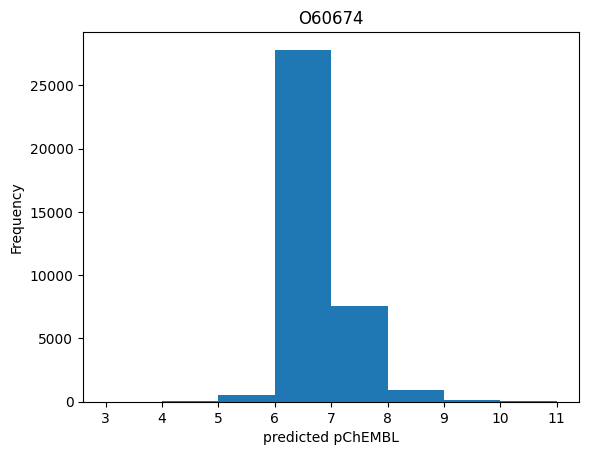

P00519


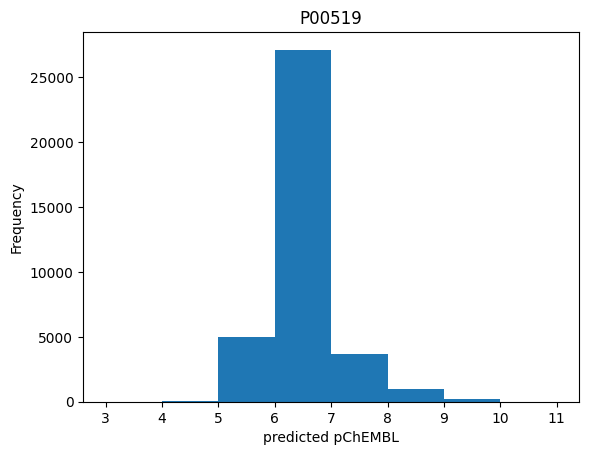

P00533


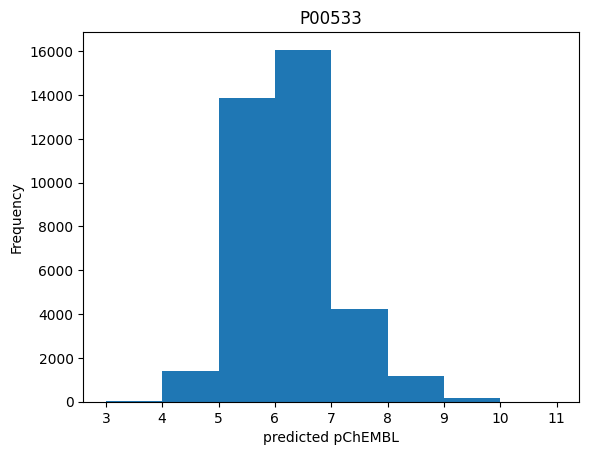

P04626


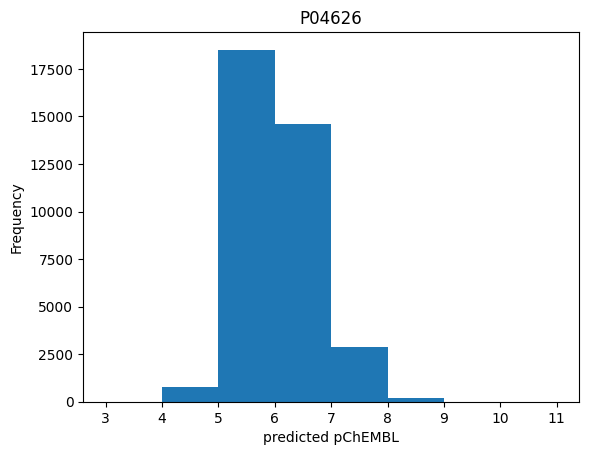

P07333


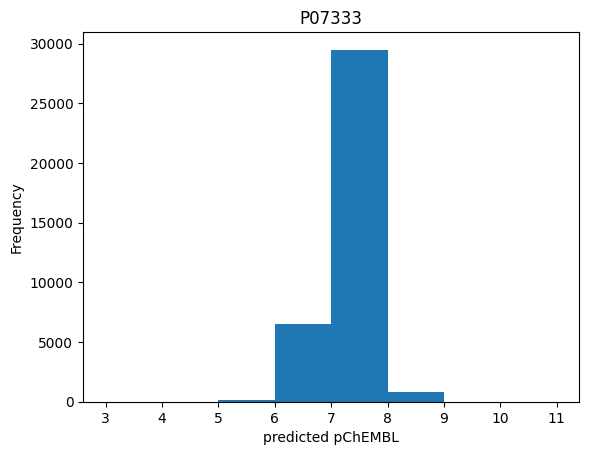

P08069


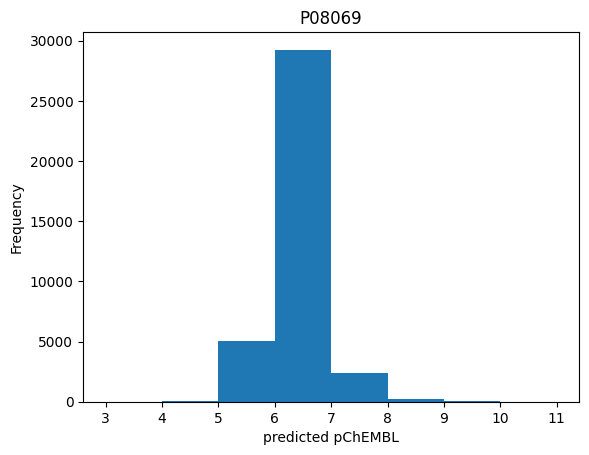

P08581


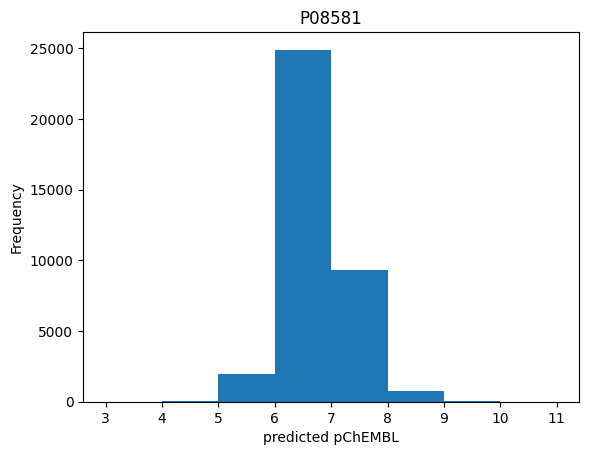

P11362


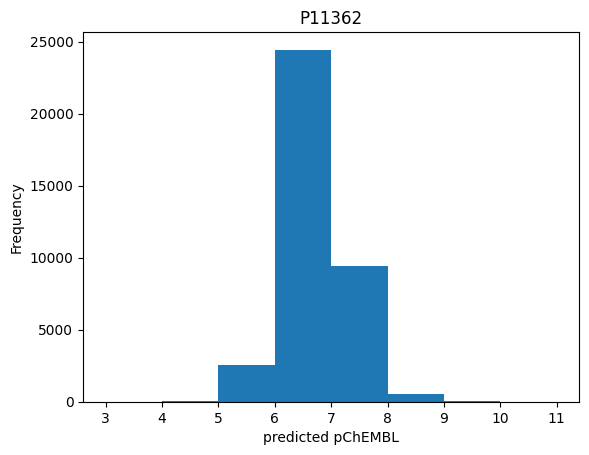

P12931


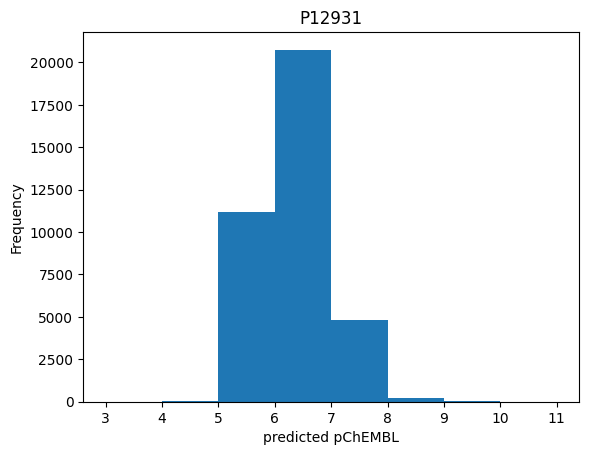

P21802


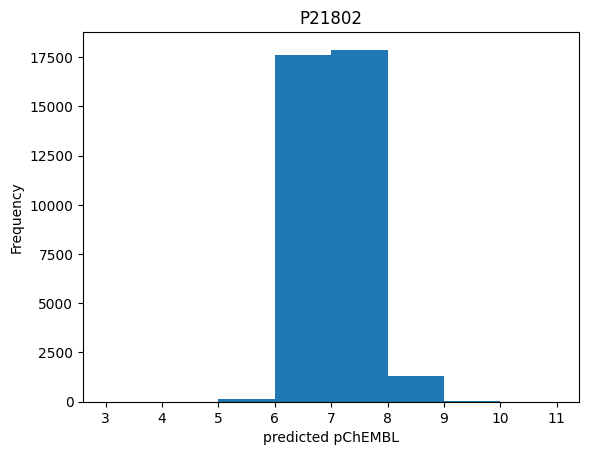

P22455


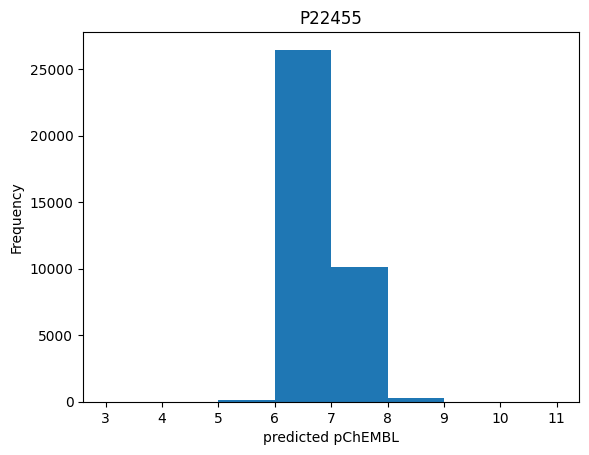

P22607


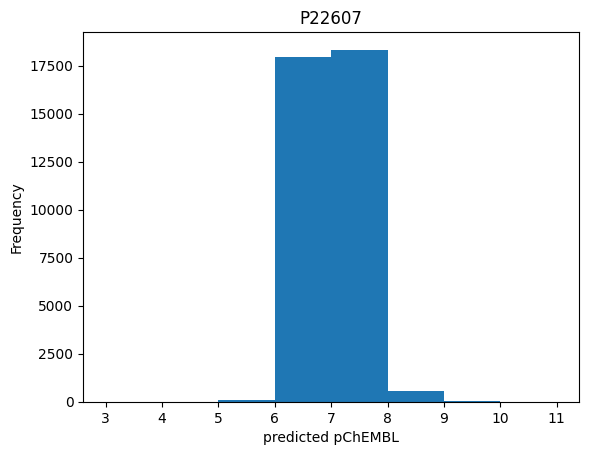

P23458


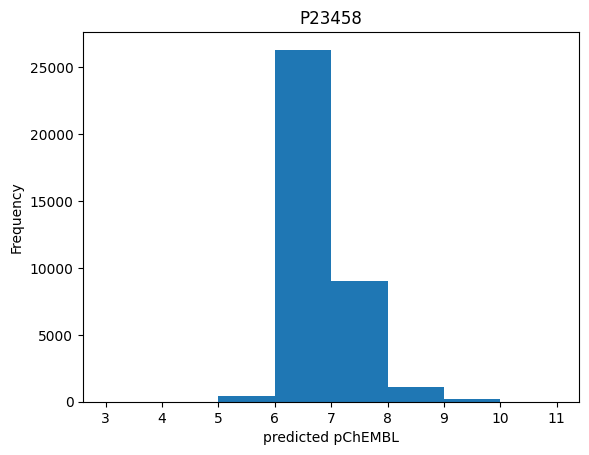

P29317


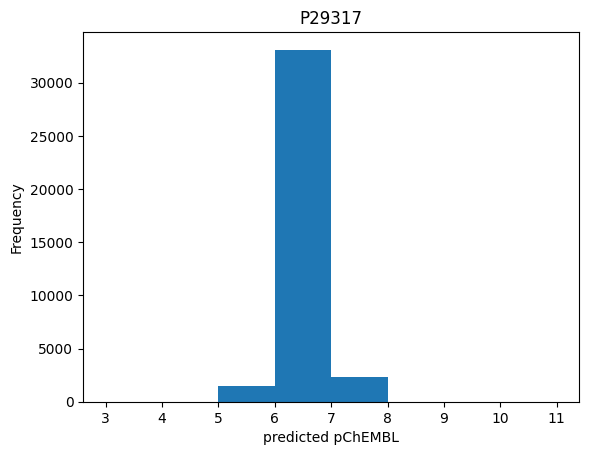

P29597


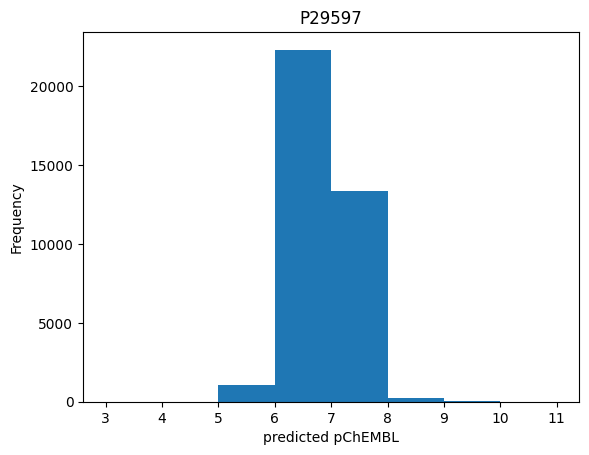

P30530


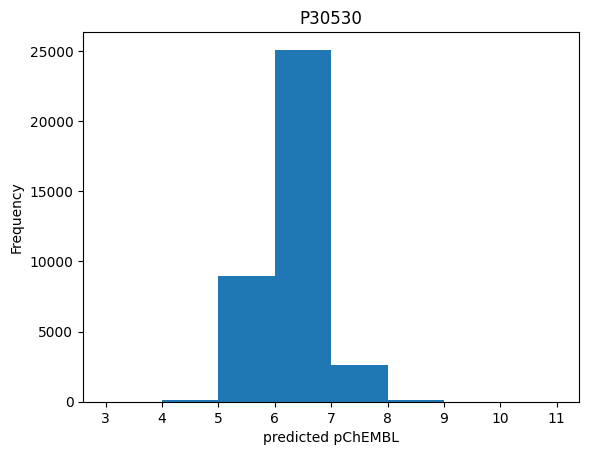

P35968


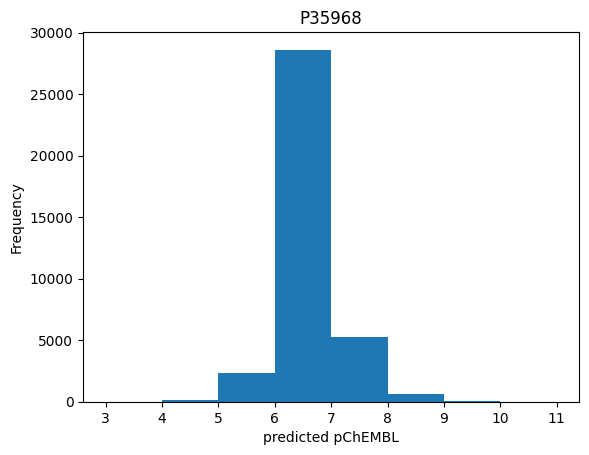

P36888


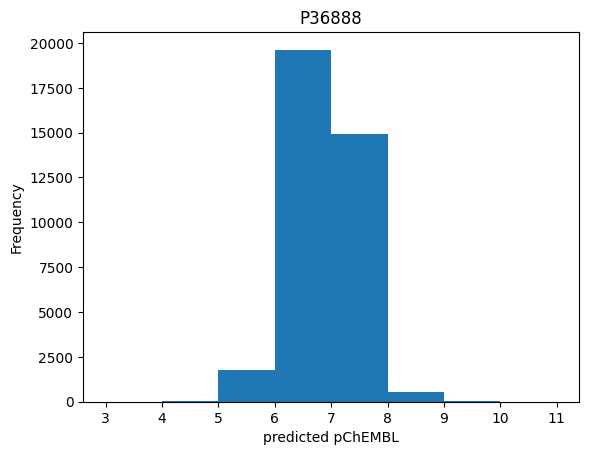

P43405


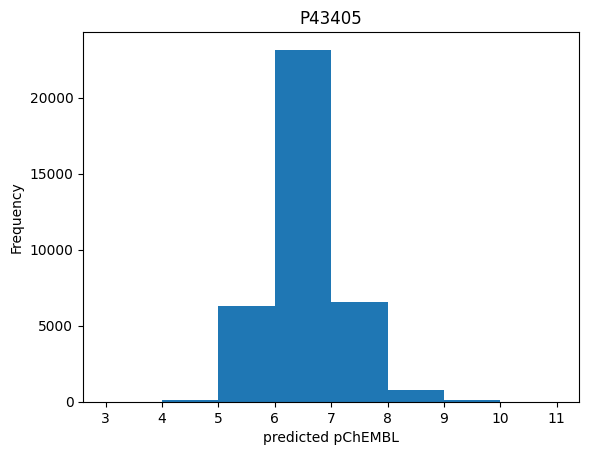

P52333


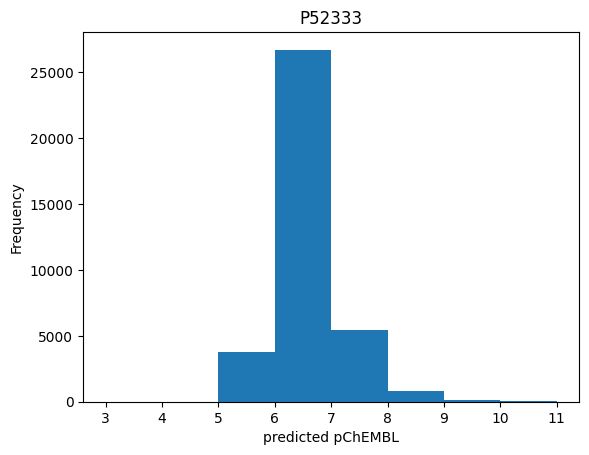

Q05397


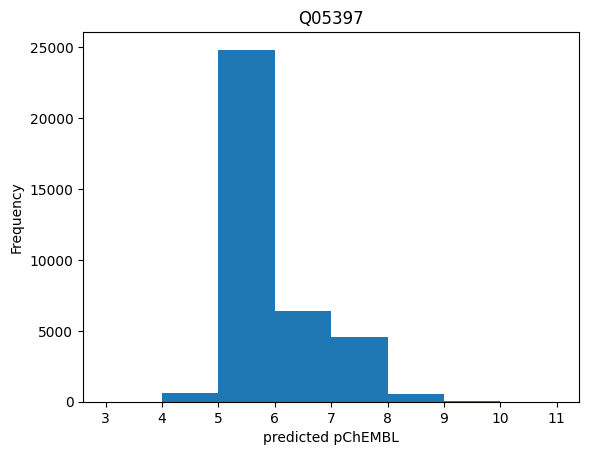

top targets


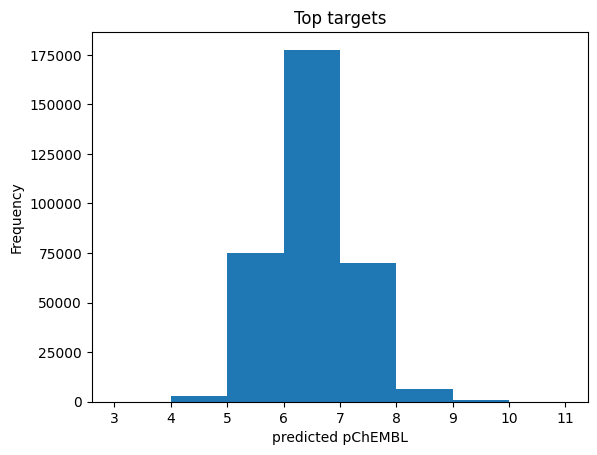

selected targets


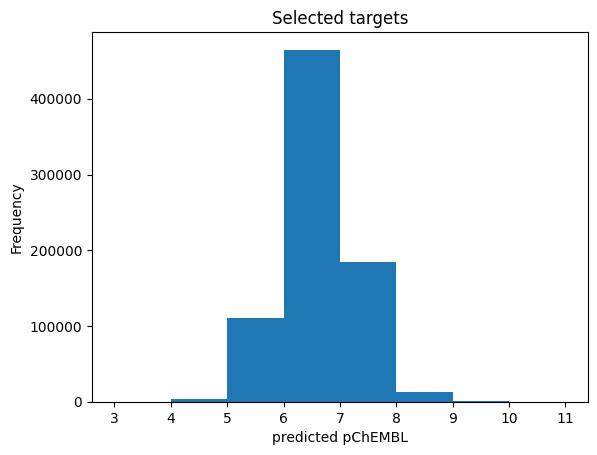

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
for target in selected_targets:
    print(f'{target}')
    pathvar = "/home/s2861704/ppk/test_kin/output/final/results/histograms/" + target + "_dist.png"
    pred_df_full[f'{target}'].plot(kind = 'hist', bins=[3,4,5,6,7,8,9,10,11])
    # plt.ylim(2,12)
    plt.xlabel('predicted pChEMBL')
    # plt.ylabel('pChEMBL')
    plt.title(f'{target}')
    plt.savefig(pathvar)
    plt.show()

print("top targets")
pred_df_top_single.plot(kind = 'hist', bins=[3,4,5,6,7,8,9,10,11], legend=False)
plt.xlabel('predicted pChEMBL')
plt.title('Top targets')
plt.savefig("/home/s2861704/ppk/test_kin/output/final/results/histograms/top-targets_dist.png")
plt.show()
print("selected targets")
pred_df_full_single.plot(kind = 'hist', bins=[3,4,5,6,7,8,9,10,11], legend=False)
plt.xlabel('predicted pChEMBL')
plt.title('Selected targets')
plt.savefig("/home/s2861704/ppk/test_kin/output/final/results/histograms/sel-targets_dist.png")
plt.show()

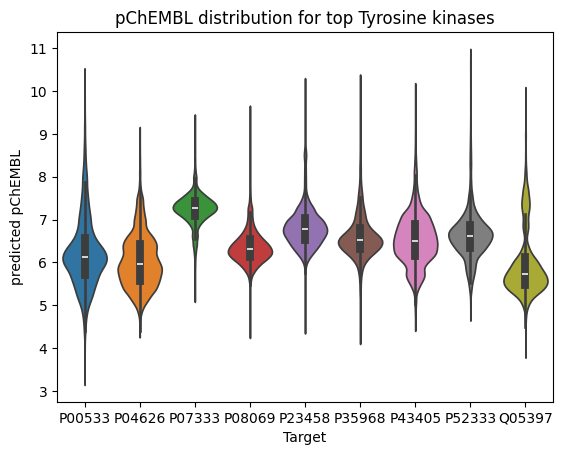

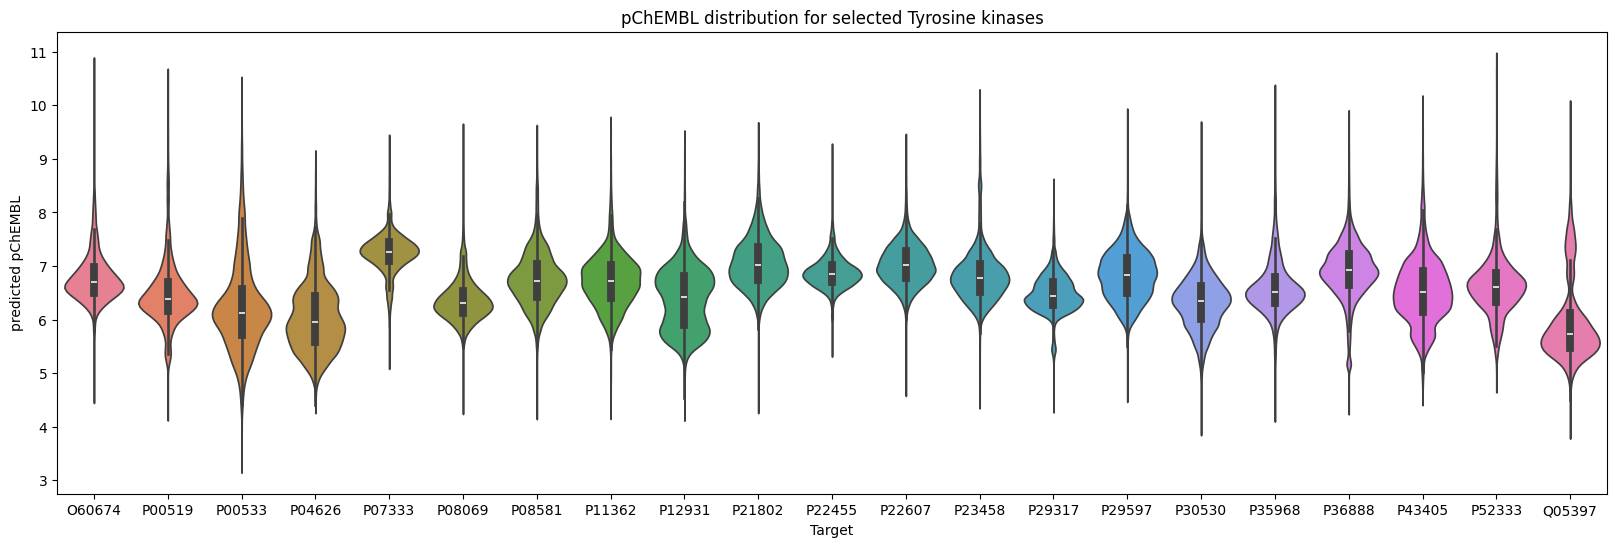

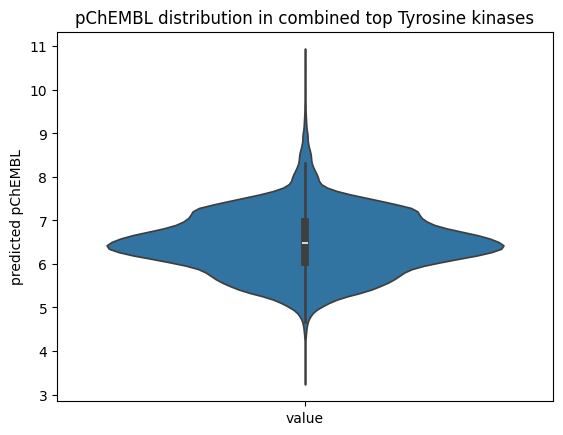

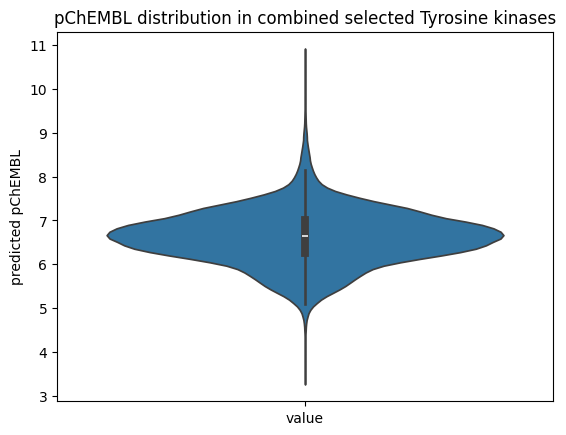

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# create violin plot for height (horizontal)
sns.violinplot(data=pred_df_top)
plt.xlabel('Target')
plt.ylabel('predicted pChEMBL')
plt.title('pChEMBL distribution for top Tyrosine kinases')
plt.savefig("/home/s2861704/ppk/test_kin/output/final/results/histograms/top-targets_violin.png") 
plt.show()

# create violin plot for height (horizontal)
plt.subplots(figsize=(20,6))
sns.violinplot(data=pred_df_full)
plt.xlabel('Target')
plt.ylabel('predicted pChEMBL')
plt.title('pChEMBL distribution for selected Tyrosine kinases')
plt.savefig("/home/s2861704/ppk/test_kin/output/final/results/histograms/sel-targets_violin.png") 
plt.show()

# create violin plot for height (horizontal)
sns.violinplot(data=pred_df_top_single)
plt.ylabel('predicted pChEMBL')
plt.title('pChEMBL distribution in combined top Tyrosine kinases')
plt.savefig("/home/s2861704/ppk/test_kin/output/final/results/histograms/top-targets-cmb_violin")
plt.show()

# create violin plot for height (horizontal)
sns.violinplot(data=pred_df_full_single)
plt.ylabel('predicted pChEMBL')
plt.title('pChEMBL distribution in combined selected Tyrosine kinases')
plt.savefig("/home/s2861704/ppk/test_kin/output/final/results/histograms/sel-targets-cmb_violin")
plt.show()

In [12]:
import numpy as np
pred_df_full_10pc = pred_df_full.copy()
for target in selected_targets:
    print(target)
    top_10pc = pred_df_full_10pc[target].quantile(q=0.9, interpolation='nearest')
    display(top_10pc)
    pred_df_full_10pc.loc[pred_df_full_10pc[target] < top_10pc, target] = np.nan
display(pred_df_full_10pc)

O60674


7.386199999999999

P00519


7.13869

P00533


7.313379999999999

P04626


6.912683333333336

P07333


7.612072222222221

P08069


6.856375000000001

P08581


7.381999999999998

P11362


7.285850666666665

P12931


7.080260000000001

P21802


7.678195

P22455


7.238299999999999

P22607


7.514023333333333

P23458


7.330144242424242

P29317


6.911144666666664

P29597


7.421549999999995

P30530


6.919083333333334

P35968


7.231850000000006

P36888


7.502650000000002

P43405


7.242710000000004

P52333


7.20445

Q05397


7.300450000000001

,SMILES,O60674,P00519,P00533,P04626,P07333,P08069,P08581,P11362,P12931,...,P22607,P23458,P29317,P29597,P30530,P35968,P36888,P43405,P52333,Q05397
0,BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1,NaN,8.31347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1,NaN,8.34517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.54930,NaN,NaN,NaN,NaN,NaN,NaN
4,Brc1cc2c(NCc3ccccc3)ncnc2s1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36999,c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...,NaN,NaN,NaN,NaN,NaN,NaN,7.445553,NaN,NaN,...,NaN,NaN,NaN,7.46265,7.113075,NaN,NaN,NaN,NaN,NaN
37000,c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.49775,7.056100,NaN,NaN,NaN,NaN,NaN
37001,c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...,NaN,NaN,NaN,NaN,NaN,7.28,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37002,c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_combined = pd.DataFrame({'SMILES':test_mols})
for target in selected_targets:
    print(target)
    org_column = target + "_org"
    pred_column = target + "_pred"
    df_combined[org_column] = df[target]
    df_combined[pred_column] = pred_df_full[target]
display(df_combined)

O60674
P00519
P00533
P04626
P07333
P08069
P08581
P11362
P12931
P21802
P22455
P22607
P23458
P29317
P29597
P30530
P35968
P36888
P43405
P52333
Q05397


,SMILES,O60674_org,O60674_pred,P00519_org,P00519_pred,P00533_org,P00533_pred,P04626_org,P04626_pred,P07333_org,...,P35968_org,P35968_pred,P36888_org,P36888_pred,P43405_org,P43405_pred,P52333_org,P52333_pred,Q05397_org,Q05397_pred
0,BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1,NaN,6.395900,NaN,8.313470,NaN,5.411131,NaN,5.855713,NaN,...,NaN,6.986183,NaN,6.596820,NaN,6.160137,NaN,6.549130,NaN,5.102925
1,BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1,NaN,6.327750,NaN,8.345170,NaN,5.303161,NaN,5.881963,NaN,...,NaN,7.023983,NaN,6.643720,NaN,6.160137,NaN,6.570330,NaN,5.080575
2,BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1,NaN,6.256500,NaN,6.100292,NaN,6.033549,NaN,6.133460,NaN,...,NaN,6.424890,NaN,6.183356,NaN,5.952967,NaN,6.034330,NaN,5.178875
3,Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1,NaN,6.907220,NaN,6.059033,NaN,6.484560,NaN,5.945370,NaN,...,NaN,6.277680,NaN,6.794243,NaN,6.783466,NaN,6.801767,NaN,5.699100
4,Brc1cc2c(NCc3ccccc3)ncnc2s1,NaN,6.311750,NaN,6.173164,6.62,6.405848,NaN,5.778008,NaN,...,NaN,6.123380,NaN,6.360935,NaN,5.565847,NaN,5.811820,NaN,5.042525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36999,c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...,NaN,6.707830,NaN,5.477080,NaN,6.716743,NaN,6.374507,NaN,...,NaN,6.845250,NaN,7.394481,6.52,6.387299,NaN,7.038622,NaN,6.330222
37000,c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...,NaN,6.809560,NaN,5.480450,NaN,6.741636,NaN,6.454327,NaN,...,NaN,6.173017,NaN,7.220451,6.70,6.446100,NaN,6.869475,NaN,6.236642
37001,c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...,NaN,6.668707,NaN,6.266217,NaN,6.013665,NaN,6.119780,NaN,...,NaN,7.007380,NaN,7.210380,NaN,6.331677,NaN,6.782267,NaN,5.669535
37002,c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1,NaN,6.424367,NaN,6.309309,NaN,6.257774,NaN,5.613750,NaN,...,NaN,6.953300,NaN,7.126385,NaN,6.361343,NaN,6.770900,NaN,5.325325


O60674


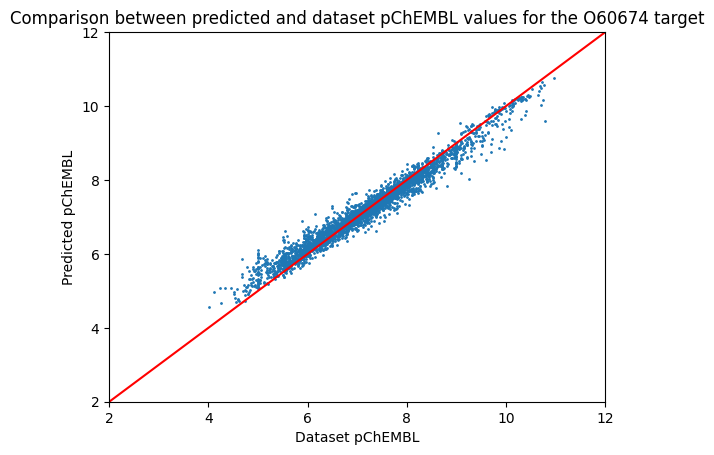

P00519


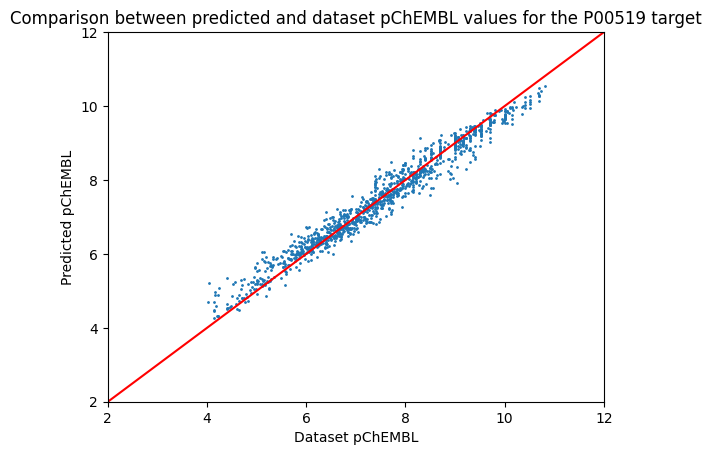

P00533


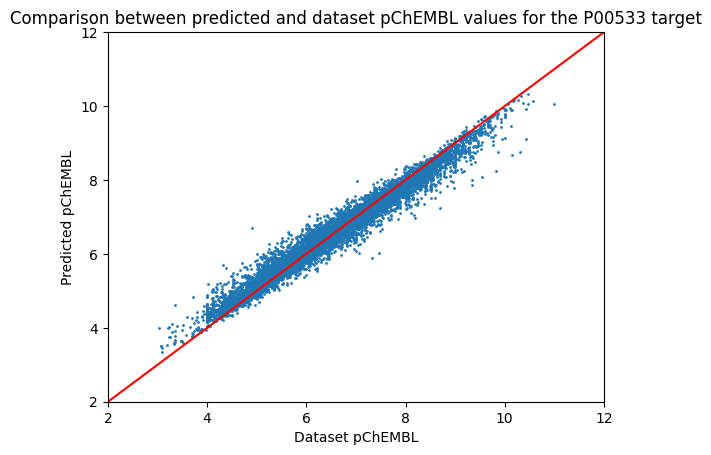

P04626


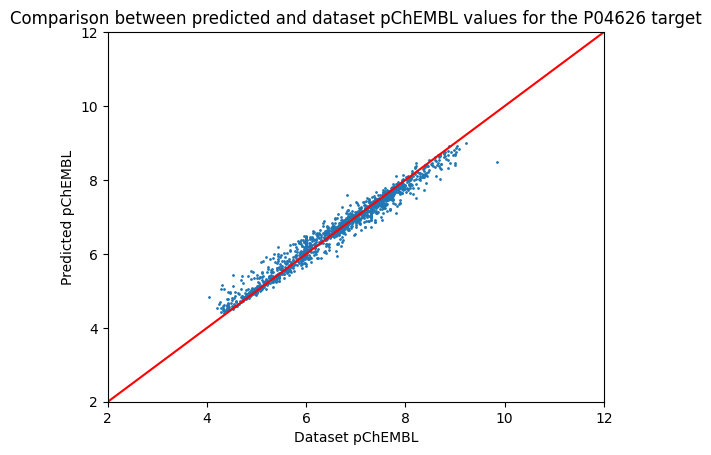

P07333


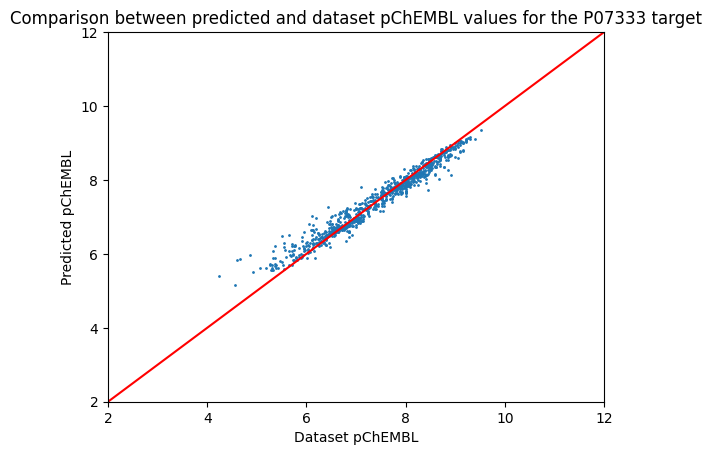

P08069


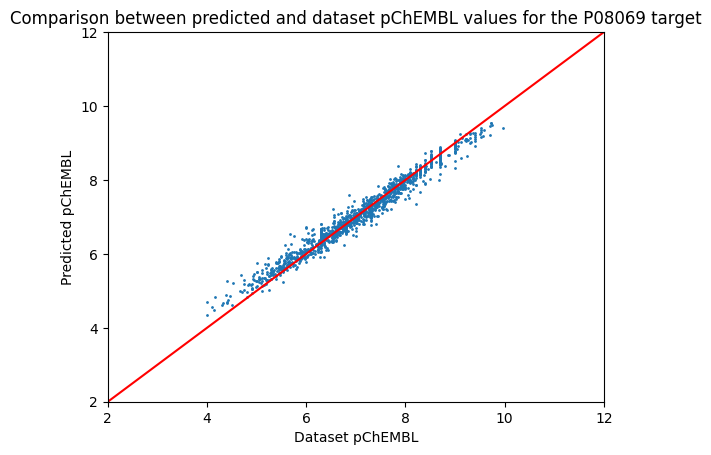

P08581


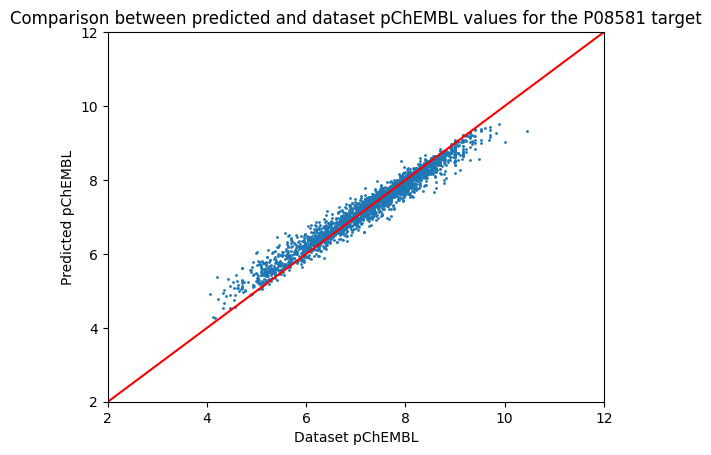

P11362


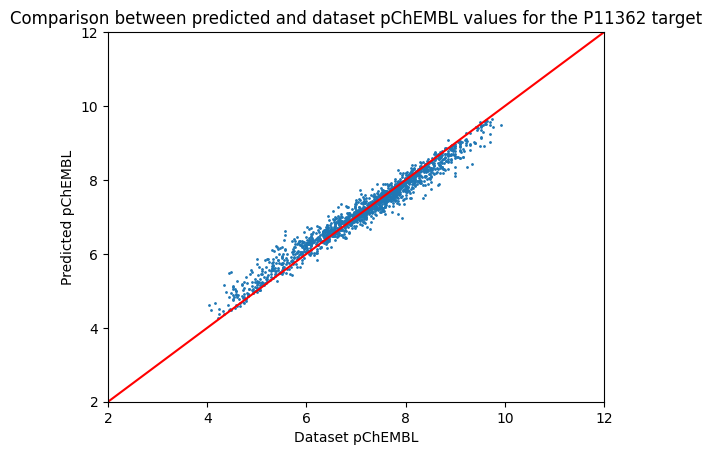

P12931


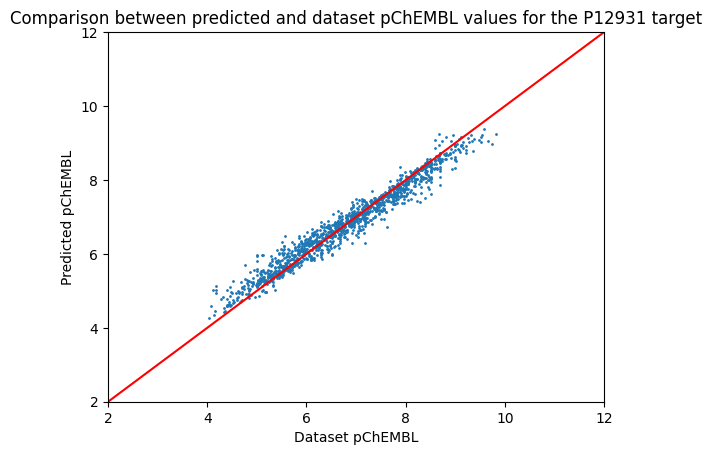

P21802


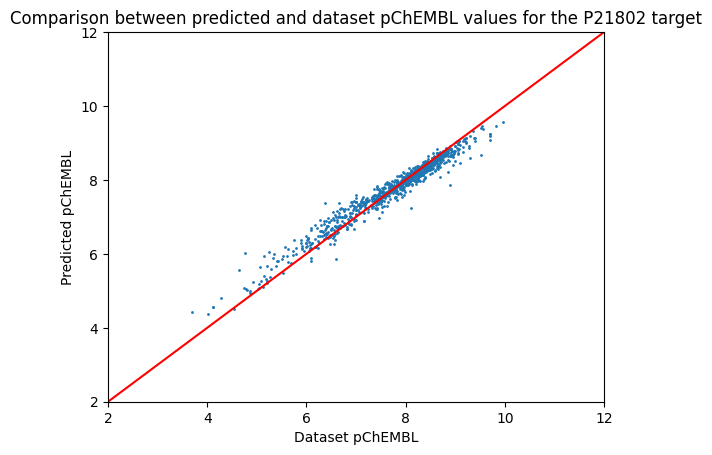

P22455


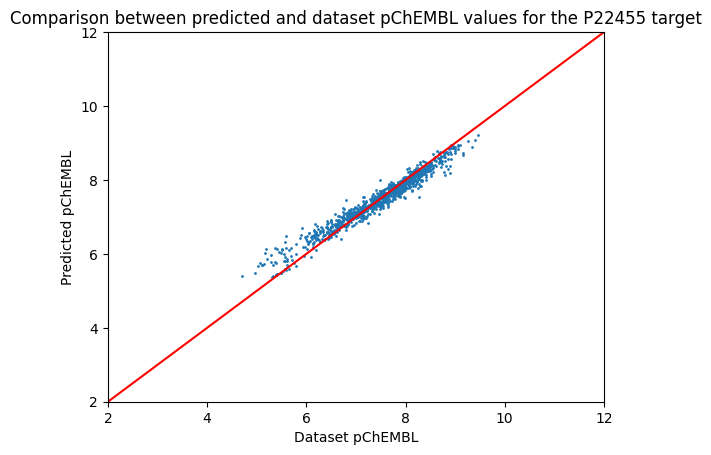

P22607


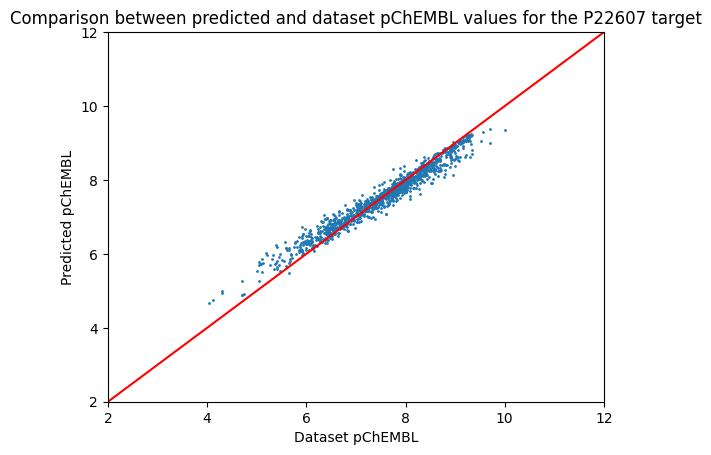

P23458


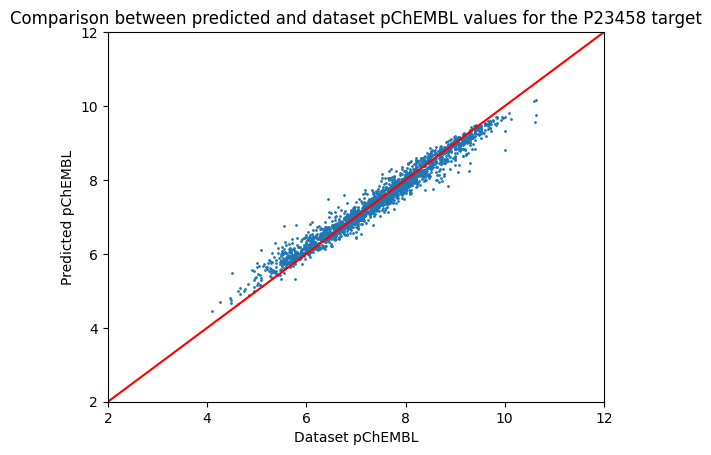

P29317


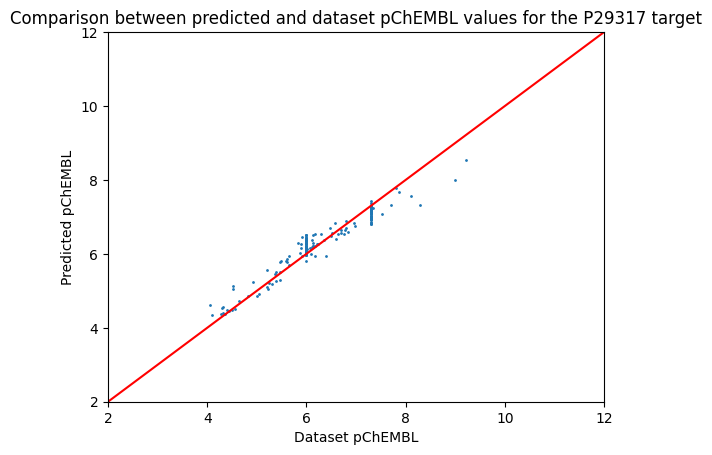

P29597


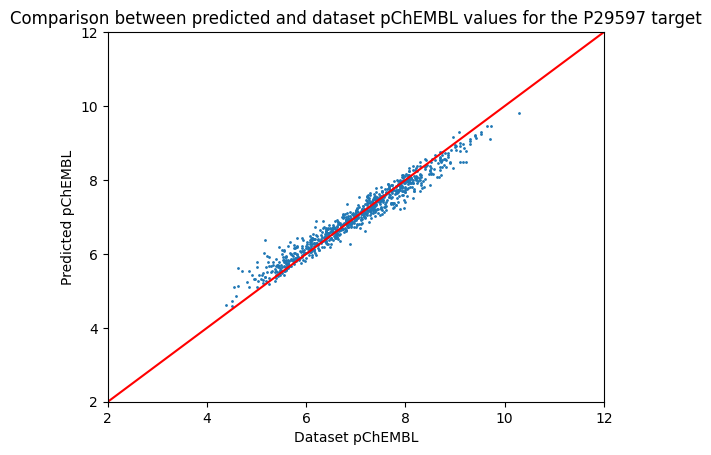

P30530


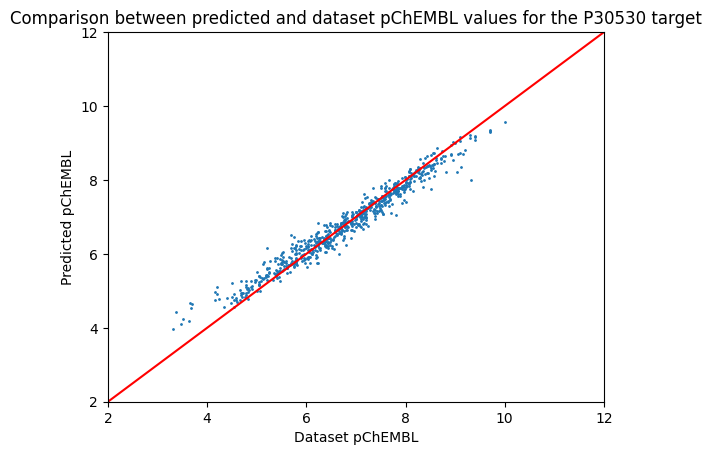

P35968


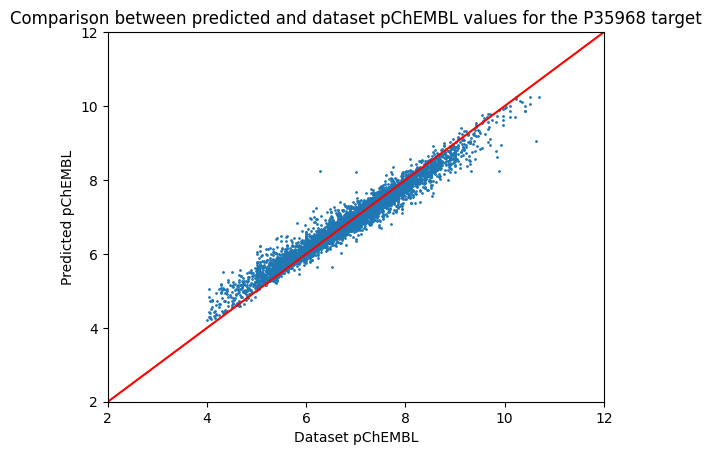

P36888


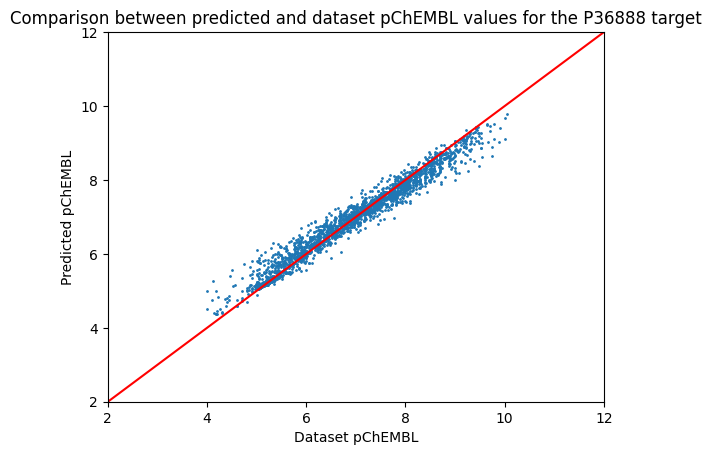

P43405


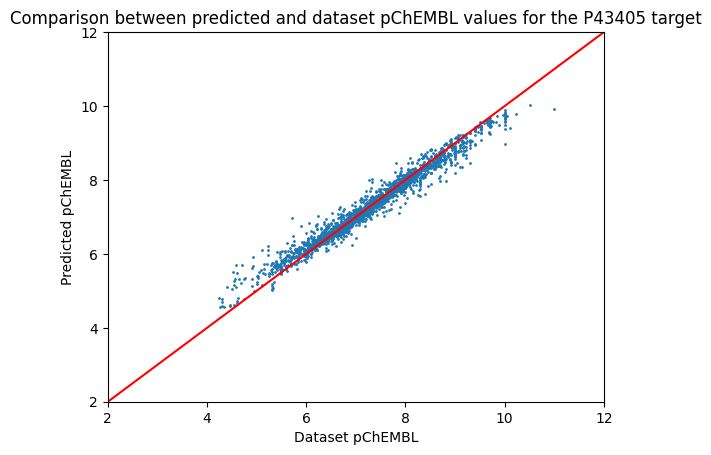

P52333


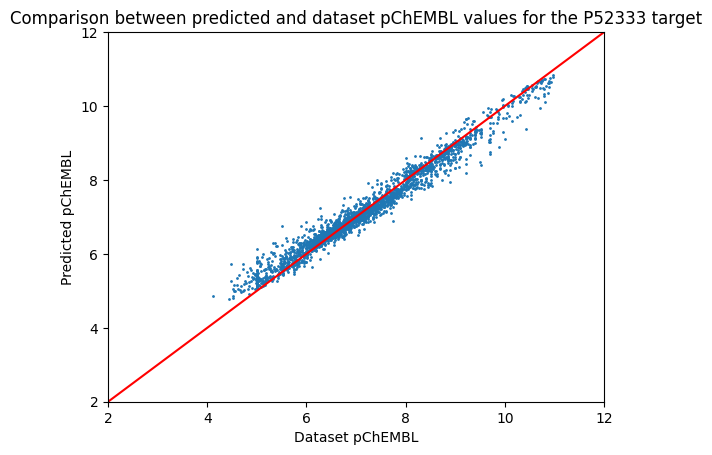

Q05397


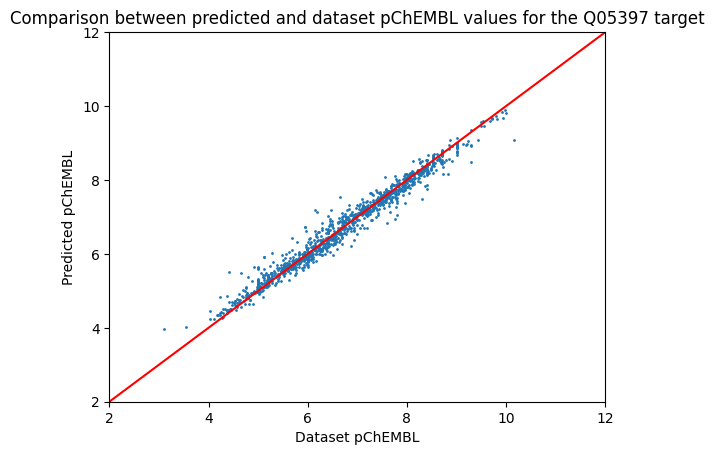

In [14]:
df_validate = pd.DataFrame({'SMILES':test_mols})
for target in selected_targets:
    print(target)
    org_column = target + "_org"
    pred_column = target + "_pred"
    df_validate['original'] = df_combined[org_column]
    df_validate['prediction'] = df_combined[pred_column]

    saveloc = "/home/s2861704/ppk/test_kin/output/final/results/validation/" + target + "_validation.png"
    df_validate.plot(kind = 'scatter', x = 'original', y = 'prediction', s=1)
    plt.xlim(2,12)
    plt.ylim(2,12)
    plt.plot([0, 15], [0, 15], color = 'red')
    plt.xlabel('Dataset pChEMBL')
    plt.ylabel('Predicted pChEMBL')
    plt.title(f'Comparison between predicted and dataset pChEMBL values for the {target} target')
    plt.savefig(saveloc)
    plt.show()


In [ ]:
list_numbers = list(range(1, 37)) # for top_targets: (1,37) / for selected_targets: (1,211)
df_chord_n = pd.DataFrame(list_numbers, columns = ['Numbers'])
print(df_chord_n)

    Numbers
0         1
1         2
2         3
3         4
4         5
5         6
6         7
7         8
8         9
9        10
10       11
11       12
12       13
13       14
14       15
15       16
16       17
17       18
18       19
19       20
20       21
21       22
22       23
23       24
24       25
25       26
26       27
27       28
28       29
29       30
30       31
31       32
32       33
33       34
34       35
35       36


In [16]:
sources_chord = top_targets.copy()
targets_chord = top_targets.copy()
sourcelist = []
targetlist = []
for source in sources_chord:
    print(source)
    del targets_chord[0]
    for target in targets_chord:
        sourcelist.append(source)
        targetlist.append(target)
print(sourcelist)
print(targetlist)

df_chord_n['source'] = sourcelist
df_chord_n['target'] = targetlist
df_chord = df_chord_n.drop(['Numbers'], axis=1)
display(df_chord)

P00533
P04626
P07333
P08069
P23458
P35968
P43405
P52333
Q05397
['P00533', 'P00533', 'P00533', 'P00533', 'P00533', 'P00533', 'P00533', 'P00533', 'P04626', 'P04626', 'P04626', 'P04626', 'P04626', 'P04626', 'P04626', 'P07333', 'P07333', 'P07333', 'P07333', 'P07333', 'P07333', 'P08069', 'P08069', 'P08069', 'P08069', 'P08069', 'P23458', 'P23458', 'P23458', 'P23458', 'P35968', 'P35968', 'P35968', 'P43405', 'P43405', 'P52333']
['P04626', 'P07333', 'P08069', 'P23458', 'P35968', 'P43405', 'P52333', 'Q05397', 'P07333', 'P08069', 'P23458', 'P35968', 'P43405', 'P52333', 'Q05397', 'P08069', 'P23458', 'P35968', 'P43405', 'P52333', 'Q05397', 'P23458', 'P35968', 'P43405', 'P52333', 'Q05397', 'P35968', 'P43405', 'P52333', 'Q05397', 'P43405', 'P52333', 'Q05397', 'P52333', 'Q05397', 'Q05397']


,source,target
0,P00533,P04626
1,P00533,P07333
2,P00533,P08069
3,P00533,P23458
4,P00533,P35968
5,P00533,P43405
6,P00533,P52333
7,P00533,Q05397
8,P04626,P07333
9,P04626,P08069


In [17]:
display(pred_df_full_10pc)

,SMILES,O60674,P00519,P00533,P04626,P07333,P08069,P08581,P11362,P12931,...,P22607,P23458,P29317,P29597,P30530,P35968,P36888,P43405,P52333,Q05397
0,BrC(Cn1ncc2c(N3CCCC3)ncnc21)c1ccccc1,NaN,8.31347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BrC(Cn1ncc2c(N3CCCCC3)ncnc21)c1ccccc1,NaN,8.34517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BrC(Cn1ncc2c(NCc3ccccc3)ncnc21)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brc1cc(CNc2ncc(Br)c(Nc3cc(C4CC4)[nH]n3)n2)on1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.54930,NaN,NaN,NaN,NaN,NaN,NaN
4,Brc1cc2c(NCc3ccccc3)ncnc2s1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36999,c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...,NaN,NaN,NaN,NaN,NaN,NaN,7.445553,NaN,NaN,...,NaN,NaN,NaN,7.46265,7.113075,NaN,NaN,NaN,NaN,NaN
37000,c1nc2c(Nc3ccc(N4CCOCC4)cc3)nc(-c3ccc4c[nH]nc4c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.49775,7.056100,NaN,NaN,NaN,NaN,NaN
37001,c1ncc(-c2cc(CNc3nc(Nc4cc(C5CC5)[nH]n4)cc(N4CCO...,NaN,NaN,NaN,NaN,NaN,7.28,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37002,c1ncc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cn1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
weightlist = []
sources_chord_extra = top_targets.copy()
targets_chord_extra = top_targets.copy()
for source in sources_chord_extra:
    del targets_chord_extra[0]
    for target in targets_chord_extra:
        df_appendchord = pred_df_full_10pc.copy()
        df_appendchord1 = df_appendchord[df_appendchord[source].notna()]
        df_appendchord2 = df_appendchord1[df_appendchord1[target].notna()]
        weightvar = len(df_appendchord2.index)
        weightlist.append(weightvar)
print(weightlist)
print(len(weightlist))
print(min(weightlist))
print(max(weightlist))

[1536, 270, 710, 173, 251, 202, 400, 421, 392, 436, 149, 198, 276, 816, 299, 262, 349, 534, 561, 386, 375, 448, 267, 183, 547, 1151, 291, 465, 988, 317, 432, 244, 667, 477, 468, 451]
36
149
1536


In [19]:
df_chord['weight'] = weightlist
display(df_chord)

,source,target,weight
0,P00533,P04626,1536
1,P00533,P07333,270
2,P00533,P08069,710
3,P00533,P23458,173
4,P00533,P35968,251
5,P00533,P43405,202
6,P00533,P52333,400
7,P00533,Q05397,421
8,P04626,P07333,392
9,P04626,P08069,436


In [ ]:
df_chord.loc[df_chord['weight'] > 1200, 'weight']
print(df_chord.loc[[39]])
print(df_chord.loc[[120]])
print(df_chord.loc[[122]])
print(df_chord.loc[[145]])

    source  target  weight
39  P00533  P04626    1536
     source  target  weight
120  P11362  P21802    1499
     source  target  weight
122  P11362  P22607    1341
     source  target  weight
145  P21802  P22607    1439


In [20]:
from d3blocks import D3Blocks
d3 = D3Blocks(chart='Chord', frame=False)
d3.set_node_properties(df_chord, opacity=0.5, cmap='tab20')
d3.set_edge_properties(df_chord, color='source', opacity='source')
d3.show(filepath='/home/s2861704/ppk/test_kin/output/final/results/chord/d3blocks_top.html')

[d3blocks] >INFO> Cleaning edge_properties and config parameters..
[d3blocks] >INFO> Initializing [Chord]
[d3blocks] >INFO> filepath is set to [/tmp/d3blocks/chord.html]
[d3blocks] >INFO> Node properties are set.
[d3blocks] >INFO> Edge properties are set.
[d3blocks] >INFO> Set [filepath]: /home/s2861704/ppk/test_kin/output/final/results/chord/d3blocks_top.html
[d3blocks] >INFO> Open browser: /home/s2861704/ppk/test_kin/output/final/results/chord/d3blocks_top.html
